In [17]:
#In this example, a TensorFlow fully connected neural network is used as for multivariable classification
#!pip install tensorflow
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
# Convert labels to one-hot encoded format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Define the neural network.
# Layers:
#Input: has as many neurons as features in the dataset
#hidden layer 1: it has 64 neurons and a relu activation function
#hidden layer 2: it has 32 neurons, and also a relu activation function
#output layer: it has 3 neurons, as many as the classes to classify,
#it uses softmax activation function to assign probabilities to each class

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [23]:
# Compile the model specifing Adam as the algorithm for optimizing the weights and
# sparse_categorical_crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model for 100 epochs using 'history' to show the loss function
# and accuracy, as well as validation, at each epoch
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 1.0804 - accuracy: 0.3229 - val_loss: 1.0518 - val_accuracy: 0.5833
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0107 - accuracy: 0.6458 - val_loss: 0.9920 - val_accuracy: 0.6250
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9484 - accuracy: 0.7083 - val_loss: 0.9377 - val_accuracy: 0.7083
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.8924 - accuracy: 0.7708 - val_loss: 0.8875 - val_accuracy: 0.7500
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.8424 - accuracy: 0.7812 - val_loss: 0.8425 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7939 - accuracy: 0.7917 - val_loss: 0.8041 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.7520 - accuracy: 0.8021 - val_loss: 0.7705 - val_accuracy: 0.7500
Epoch 8/100
3/3 [===

In [25]:
# Evaluate the model with loss function and accuracy with the test split
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

1/1 [==============================] - 0s 26ms/step - loss: 0.0650 - accuracy: 1.0000

Test accuracy: 1.0


In [26]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 58ms/step


In [27]:
# Print classification report that contains additional metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



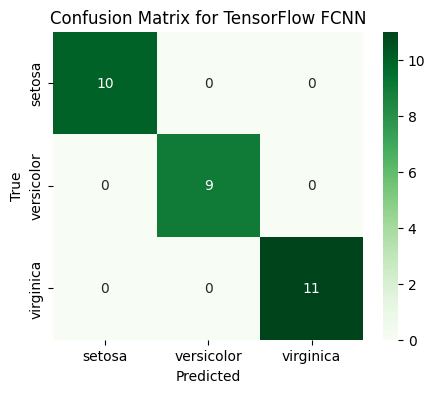

In [28]:
#plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_classes)

class_labels = ['setosa', 'versicolor', 'virginica']

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TensorFlow FCNN')

# Display the plot
plt.show()